<h1>Test result analysis<h1>

In [1]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics.cluster import pair_confusion_matrix
import seaborn as sn
font = {'size'   : 22}

plt.rc('font', **font)

<h2>Compute similarity matrices<h2>

The pair confusion matrix  computes a 2 by 2 similarity matrix between two clusterings by considering all pairs of samples and counting pairs that are assigned into the same or into different clusters under the true and predicted clusterings.

Considering a pair of samples that is clustered together a positive pair, then as in binary classification the count of true negatives is C00, false negatives is C10, true positives C11 is  and false positives is C01.

In [24]:
dataset = 'noisymoon'
configuration = 7

In [11]:
df_assignment_qkmeans = pd.read_csv("result/assignment/" + str(dataset) + "_qkmeans" + "_" + str(configuration) + ".csv", sep=',')
quantum_assignment = df_assignment_qkmeans['cluster']

In [25]:
df_assignment_kmeans = pd.read_csv("FINALTEST/m1sintetici/result/assignment/" + str(dataset) + "_kmeans" + "_" + str(0) + ".csv", sep=',')
classical_assignment = df_assignment_kmeans['cluster']

In [29]:
deltaconf = 46

In [30]:
df_assignment_deltameans = pd.read_csv("FINALTEST/delta/" + str(dataset) + "/result/assignment/" + str(dataset) + "_deltakmeans" + "_" + str(deltaconf) + ".csv", sep=',')
delta_assignment = df_assignment_deltameans['cluster']

FileNotFoundError: [Errno 2] No such file or directory: 'FINALTEST/delta/noisymoon/result/assignment/noisymoon_deltakmeans_46.csv'

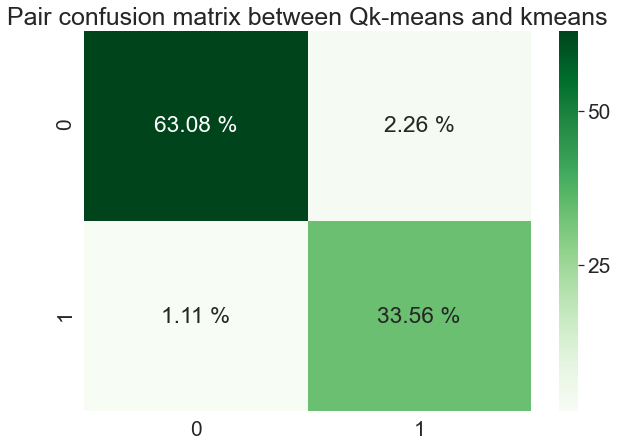

In [14]:
cm = pair_confusion_matrix(quantum_assignment, classical_assignment)
plt.figure(figsize = (10,7))
plt.title("Pair confusion matrix between Qk-means and kmeans", fontsize=25)
cm = (cm/np.sum(cm))*100
s = sn.heatmap(cm, annot=True, fmt=".2f", cmap='Greens')
for t in s.texts: t.set_text(t.get_text() + " %")
sn.set(font_scale=19)

In [10]:
cm = pair_confusion_matrix(quantum_assignment, delta_assignment)
plt.figure(figsize = (10,7))
plt.title("Pair confusion matrix between Qk-means and delta-kmeans", fontsize=25)
cm = (cm/np.sum(cm))*100
s = sn.heatmap(cm, annot=True, fmt=".2f", cmap='Greens')
for t in s.texts: t.set_text(t.get_text() + " %")
sn.set(font_scale=1.9)

NameError: name 'quantum_assignment' is not defined

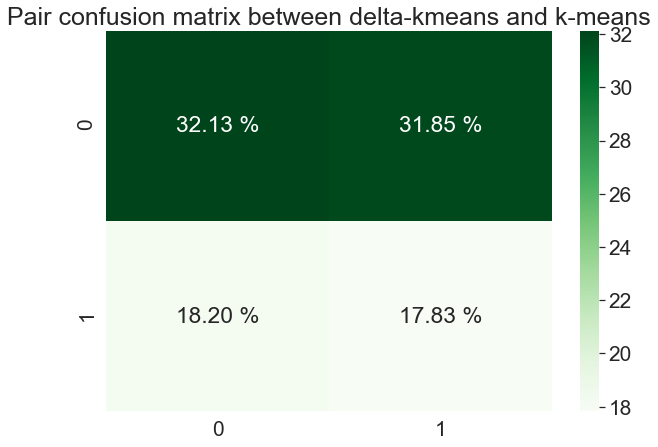

In [31]:
cm = pair_confusion_matrix(delta_assignment, classical_assignment)
plt.figure(figsize = (10,7))
plt.title("Pair confusion matrix between delta-kmeans and k-means", fontsize=25)
cm = (cm/np.sum(cm))*100
s = sn.heatmap(cm, annot=True, fmt=".2f", cmap='Greens')
for t in s.texts: t.set_text(t.get_text() + " %")
sn.set(font_scale=1.9)

<h2>Configuration analysis<h2>

In [63]:
dataset = 'aniso'

In [64]:
df_qkmeans = pd.read_csv("result/" + str(dataset) + "_qkmeans.csv", sep=',')
df_qkmeans

,index,date,q_v,K,M,N,M1,shots,n_circuits,max_qbits,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-03-07 15:12:53,3,3,150,2,2,6144,75,8,10,48.19,0.0001,98.33,867.730,0.671,0.694,0.694
1,1,2022-03-07 15:20:56,3,3,150,2,4,12288,38,9,7,42.07,0.0001,98.57,866.580,0.674,0.694,0.694
2,2,2022-03-07 15:12:54,3,3,150,2,8,24576,19,11,5,46.11,0.0001,97.87,866.626,0.674,0.694,0.694
3,3,2022-03-07 15:16:45,3,3,150,2,16,49152,10,13,10,55.79,0.0001,98.27,861.388,0.676,0.688,0.688
4,4,2022-03-07 15:12:54,3,3,150,2,32,98304,5,15,10,70.59,0.0001,98.87,862.638,0.671,0.659,0.659
5,5,2022-03-07 15:24:40,3,3,150,2,64,196608,3,17,10,68.06,0.0001,98.40,872.244,0.670,0.700,0.700
6,6,2022-03-07 15:12:54,3,3,150,2,128,393216,2,19,10,106.15,0.0001,98.33,873.835,0.665,0.700,0.700
7,7,2022-03-07 15:30:36,3,3,150,2,150,460800,1,21,10,325.02,0.0001,97.67,882.478,0.664,0.713,0.713


In [65]:
df_kmeans = pd.read_csv("result/" + str(dataset) + "_kmeans.csv", sep=',')
df_kmeans

,index,date,K,M,N,n_ite,avg_ite_time,treshold,SSE,silhouette,v_measure,nm_info
0,0,2022-03-07 16:24:54,3,150,2,4,0.0,0.0001,240.192,0.676,0.688,0.688


In [18]:
df_deltakmeans = pd.read_csv("result/" + str(dataset) + "_deltakmeans.csv", sep=',')
df_deltakmeans

,index,date,K,M,N,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-03-08 17:59:22,3,150,2,10,0.01,0.0001,89.2,938.722,0.546,0.66,0.66


In [67]:
df_qkmeans[df_qkmeans['SSE']==min(df_qkmeans['SSE'])]

,index,date,q_v,K,M,N,M1,shots,n_circuits,max_qbits,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
3,3,2022-03-07 15:16:45,3,3,150,2,16,49152,10,13,10,55.79,0.0001,98.27,861.388,0.676,0.688,0.688


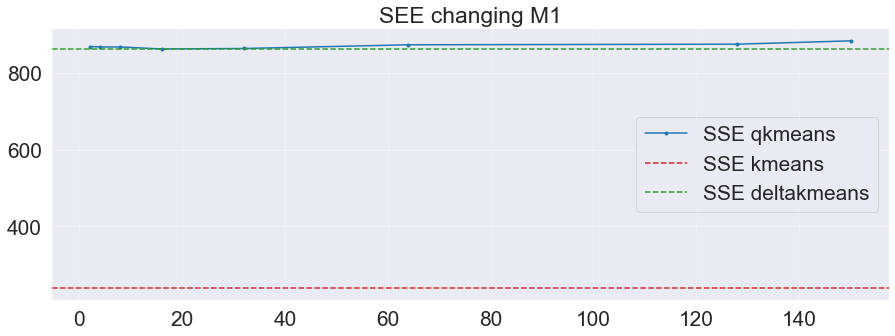

In [68]:
plt.figure(figsize=(15,5))
plt.plot(df_qkmeans['M1'],df_qkmeans['SSE'], color='tab:blue', marker=".", label='SSE qkmeans')
plt.axhline(y=float(df_kmeans['SSE']), color='tab:red', linestyle='--', label='SSE kmeans')
plt.axhline(y=float(df_deltakmeans['SSE']), color='tab:green', linestyle='--', label='SSE deltakmeans')
plt.title("SEE changing M1")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

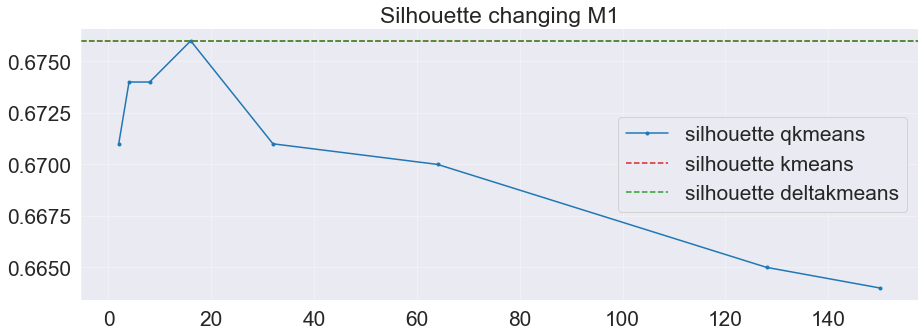

In [69]:
plt.figure(figsize=(15,5))
plt.plot(df_qkmeans['M1'],df_qkmeans['silhouette'], color='tab:blue', marker=".", label='silhouette qkmeans')
plt.axhline(y=float(df_kmeans['silhouette']), color='tab:red', linestyle='--', label='silhouette kmeans')
plt.axhline(y=float(df_deltakmeans['silhouette']), color='tab:green', linestyle='--', label='silhouette deltakmeans')
plt.title("Silhouette changing M1")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

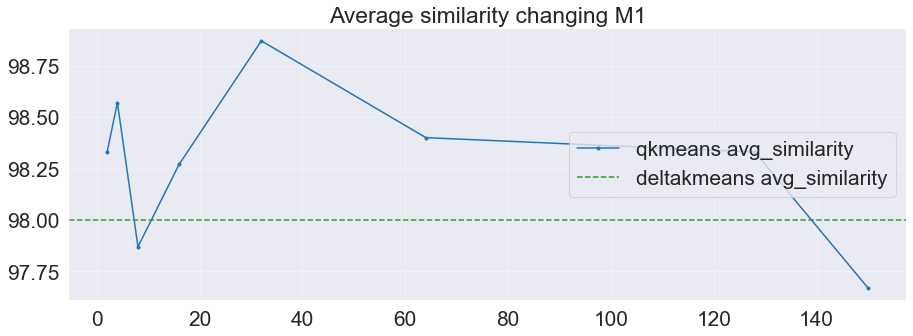

In [70]:
plt.figure(figsize=(15,5))
plt.plot(df_qkmeans['M1'],df_qkmeans['avg_similarity'], marker=".", color='tab:blue', label='qkmeans avg_similarity')
plt.axhline(y=int(df_deltakmeans['avg_similarity']), color='tab:green', linestyle='--', label='deltakmeans avg_similarity')
plt.title("Average similarity changing M1")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

<h2>Shots analysis<h2>

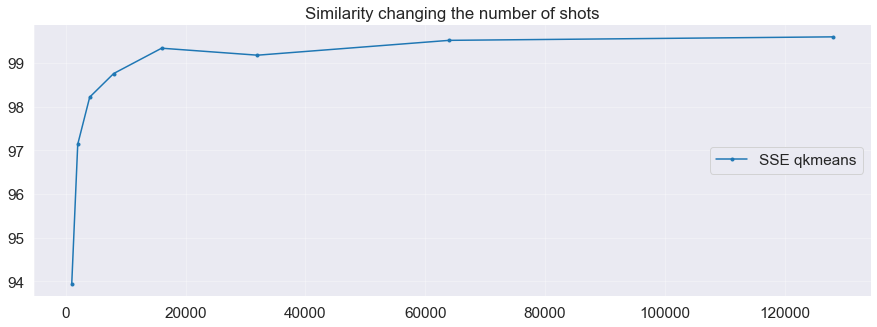

In [21]:
plt.figure(figsize=(15,5))
plt.plot(df_qkmeans['shots'],df_qkmeans['avg_similarity'], color='tab:blue', marker=".", label='SSE qkmeans')
plt.title("Similarity changing the number of shots")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

<h2>Measure analysis per iteration<h2>

In [2]:
dataset = 'diabetes'
configuration = 0

In [4]:
df_measure_qkmeans = pd.read_csv("result/measures/" + str(dataset) + "_qkmeans_" + str(configuration) + ".csv", sep=',')
#df_measure_deltakmeans = pd.read_csv("result/measures/" + str(dataset) + "_deltakmeans_0.csv", sep=',')

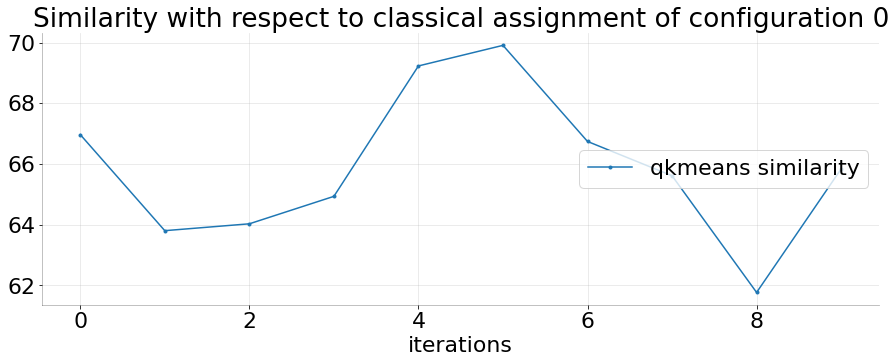

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Similarity with respect to classical assignment of configuration " + str(configuration))
ax.set(xlabel='iterations')
ax.plot(df_measure_qkmeans['similarity'], marker=".", color='tab:blue', label='qkmeans similarity')
#ax.plot(df_measure_deltakmeans['similarity'], marker=".", color="tab:green", label='deltakmeans similarity')
ax.legend()
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

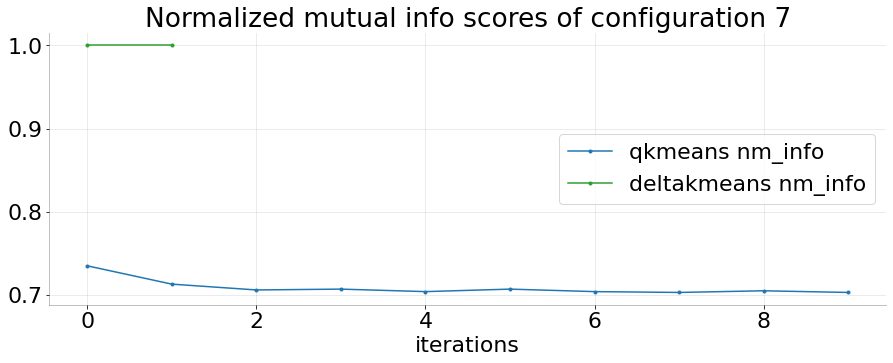

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Normalized mutual info scores of configuration " + str(configuration))
ax.set(xlabel='iterations')
ax.plot(df_measure_qkmeans['nm_info'], marker=".", color='tab:blue', label='qkmeans nm_info')
ax.plot(df_measure_deltakmeans['nm_info'], marker=".", color="tab:green", label='deltakmeans nm_info')
ax.legend()
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

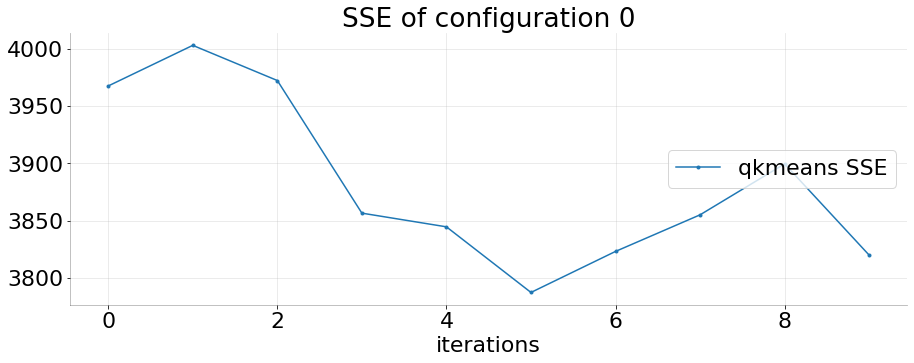

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("SSE of configuration " + str(configuration))
ax.set(xlabel='iterations')
ax.plot(df_measure_qkmeans['SSE'], marker=".", color='tab:blue', label='qkmeans SSE')
#ax.plot(df_measure_deltakmeans['SSE'], marker=".", color="tab:green", label='deltakmeans SSE')
ax.legend()
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

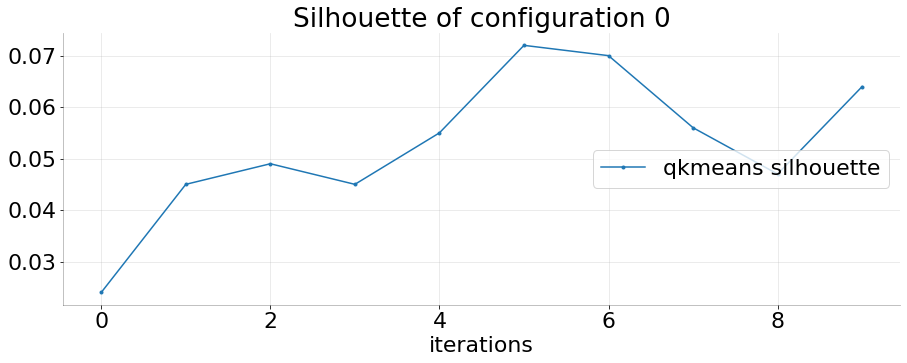

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Silhouette of configuration " + str(configuration))
ax.set(xlabel='iterations')
ax.plot(df_measure_qkmeans['silhouette'], marker=".", color='tab:blue', label='qkmeans silhouette')
#ax.plot(df_measure_deltakmeans['silhouette'], marker=".", color="tab:green", label='deltakmeans silhouette')
ax.legend()
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

<h2>Cluster result<h2>

In [33]:
dataset = ['aniso','blobs','blobs2','noisymoon']
configuration = 0

In [20]:
'''
f, axarr = plt.subplots(len(dataset),3)

curr_row = 0
for index, d in enumerate(dataset):
    
    a = plt.imread("./plot/cluster/" + str(d) + "_kmeans_0.png")
    b = plt.imread("./plot/cluster/" + str(d) + "_deltakmeans_0.png")
    c = plt.imread("./plot/cluster/" + str(d) + "_qkmeans_0.png")

    axarr[index,0].imshow(a)
    axarr[index,0].axis('off')
    axarr[index,1].imshow(b)
    axarr[index,1].axis('off')
    axarr[index,2].imshow(c)
    axarr[index,2].axis('off')
'''

'\nf, axarr = plt.subplots(len(dataset),3)\n\ncurr_row = 0\nfor index, d in enumerate(dataset):\n    \n    a = plt.imread("./plot/cluster/" + str(d) + "_kmeans_0.png")\n    b = plt.imread("./plot/cluster/" + str(d) + "_deltakmeans_0.png")\n    c = plt.imread("./plot/cluster/" + str(d) + "_qkmeans_0.png")\n\n    axarr[index,0].imshow(a)\n    axarr[index,0].axis(\'off\')\n    axarr[index,1].imshow(b)\n    axarr[index,1].axis(\'off\')\n    axarr[index,2].imshow(c)\n    axarr[index,2].axis(\'off\')\n'

In [34]:
configuration = 7

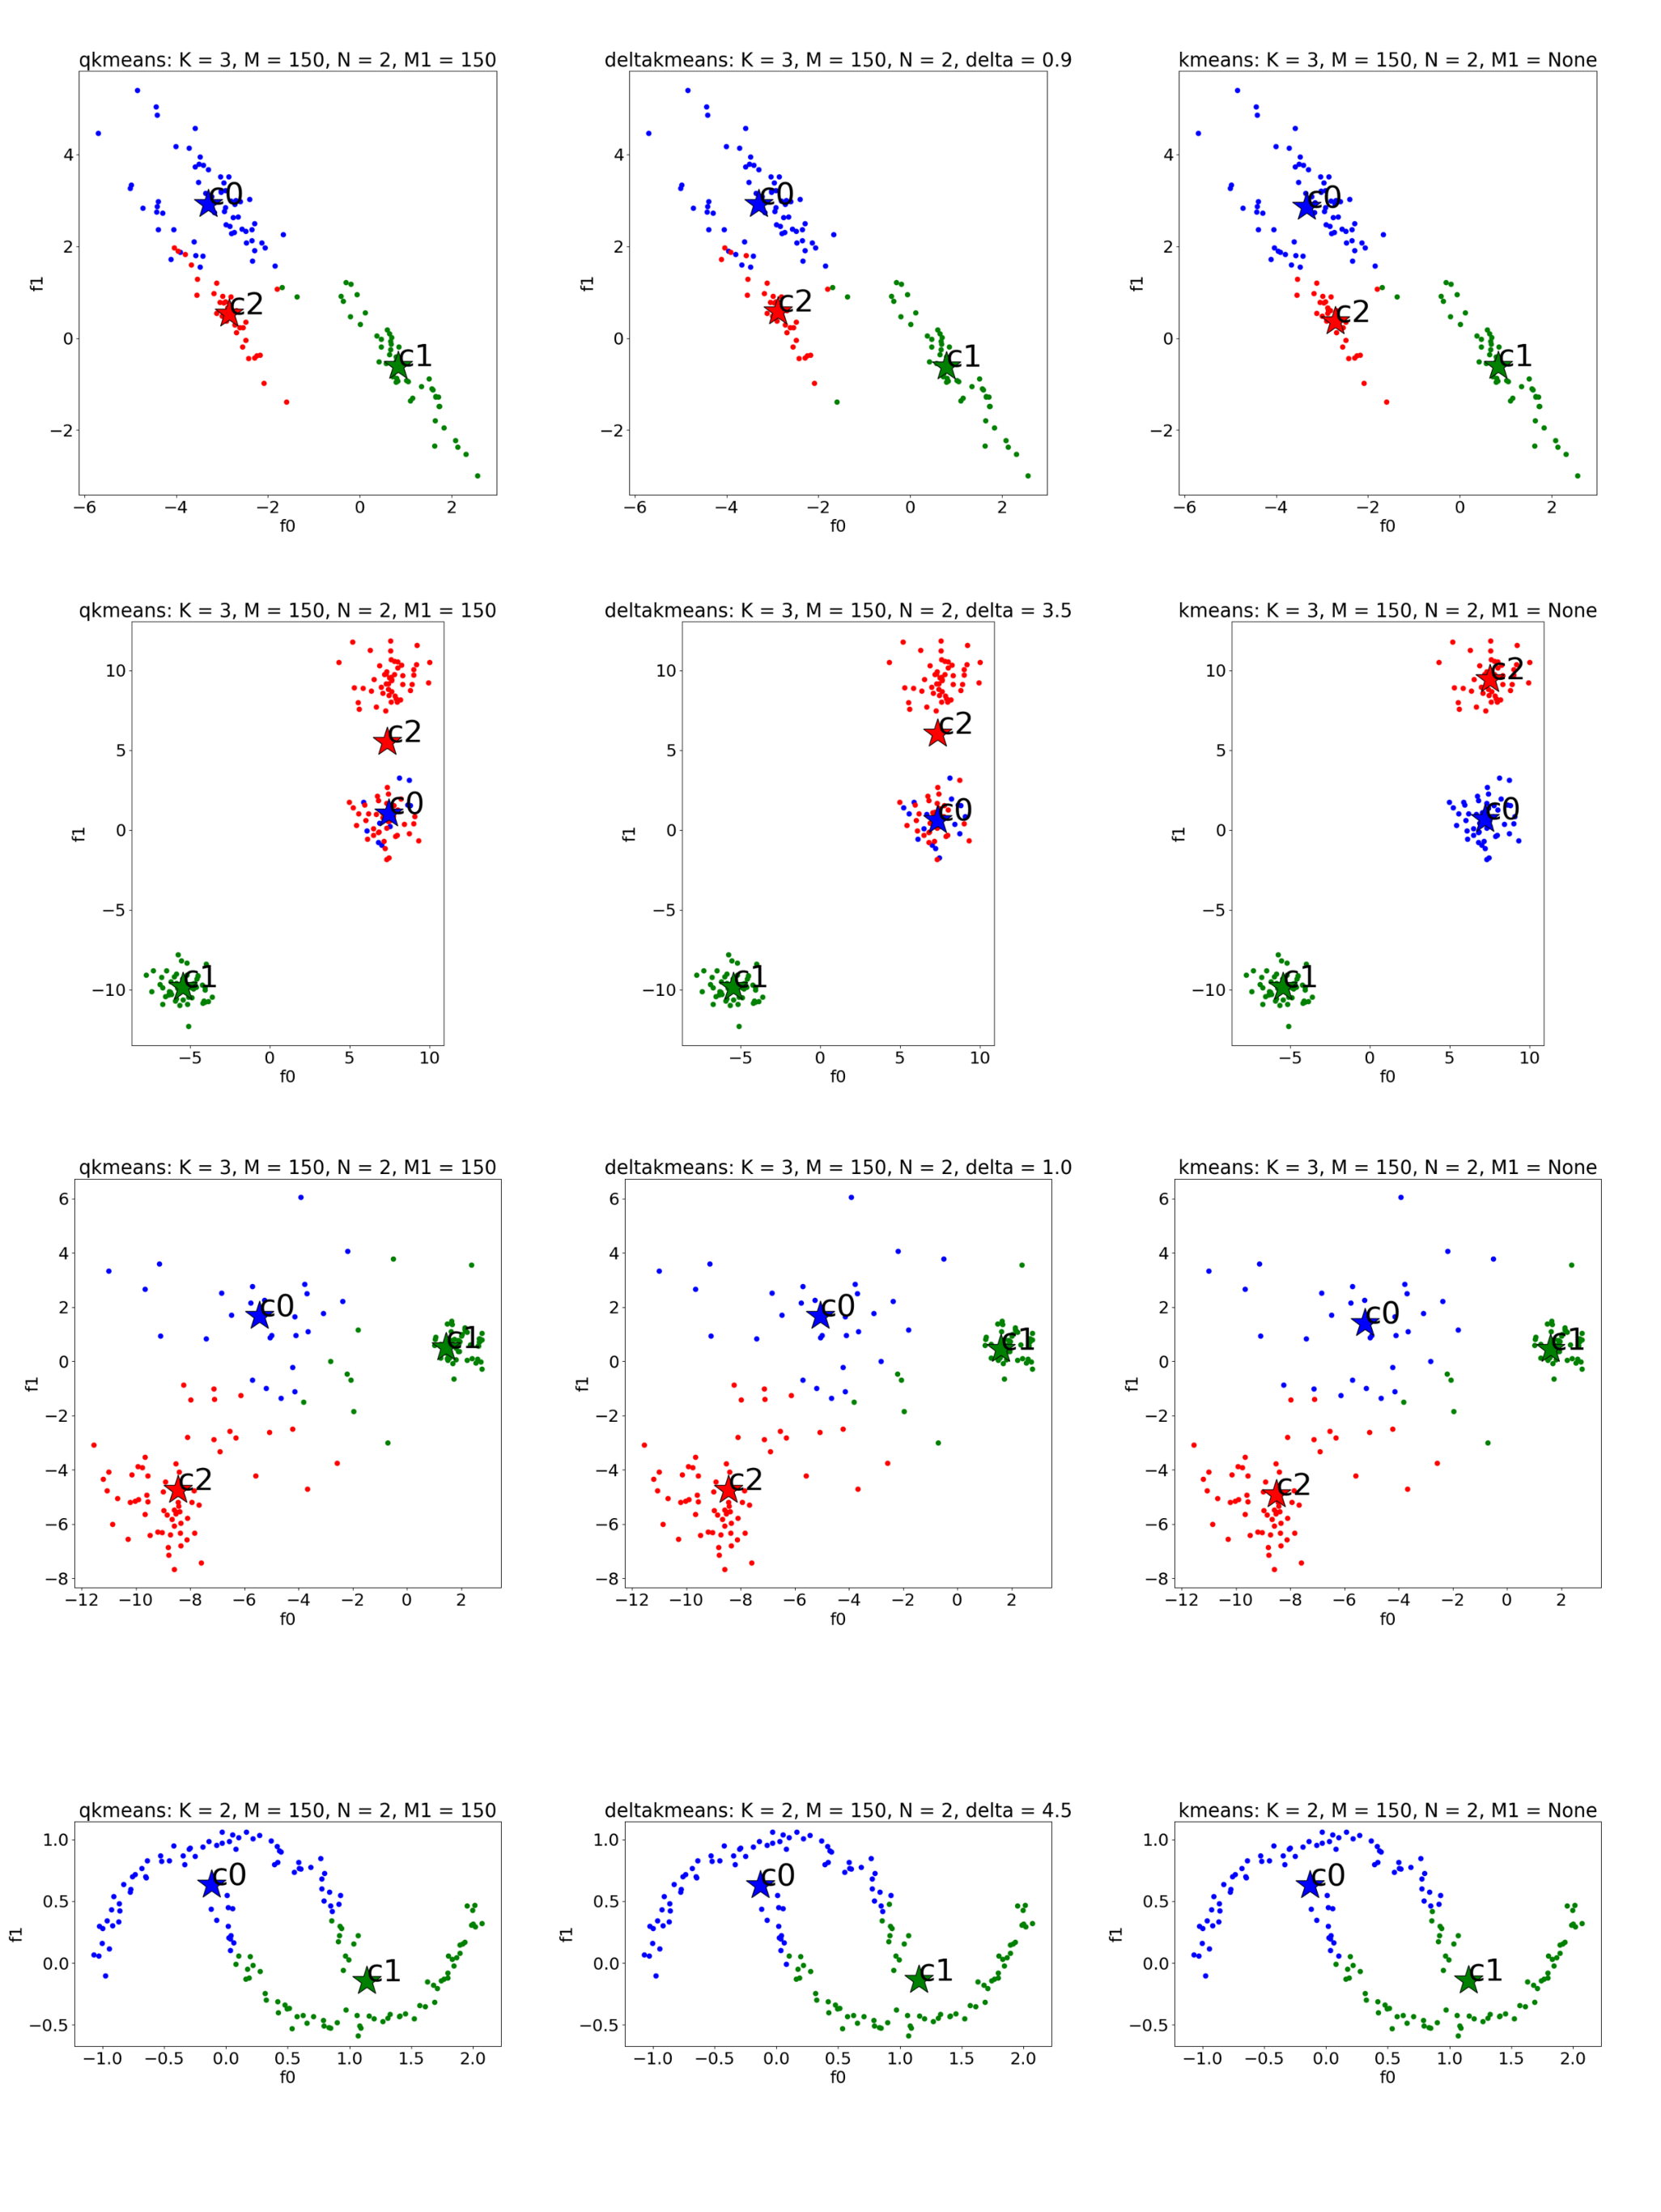

In [35]:
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = img.resize((800,800))
    img = np.asarray(img)
    return img

img_arr = []

for index, d in enumerate(dataset):
    
    img_arr.append(img_reshape("./FINALTEST/m1sintetici/plot/cluster/" + str(d) + "_qkmeans_" + str(configuration) + ".png"))
    img_arr.append(img_reshape("./FINALTEST/m1sintetici/plot/cluster/" + str(d) + "_deltakmeans_0.png"))
    img_arr.append(img_reshape("./FINALTEST/m1sintetici/plot/cluster/" + str(d) + "_kmeans_0.png"))


fig = plt.figure(figsize=(50., 50.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(len(dataset), 3),  # creates 2x2 grid of axes
                 axes_pad=0,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)
    ax.axis('off')

plt.show()

<h2>probabilities analysis <h2>

In [26]:
dataset = 'iris'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_1-inf
0,0,64,4,1,0.25,18.530273,37.438965
1,1,64,4,2,0.25,24.902344,53.796387
2,2,64,4,3,0.25,21.704102,48.559570
3,3,64,4,4,0.25,24.682617,50.585938
4,4,64,4,5,0.25,21.057129,41.638184
5,5,64,4,6,0.25,22.314453,44.689941
6,6,64,4,7,0.25,22.387695,48.583984
7,7,64,4,8,0.25,25.341797,53.039551


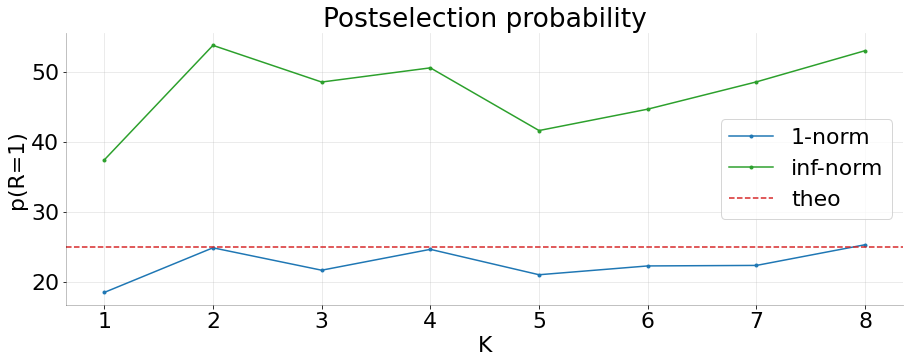

In [28]:
plt.figure(figsize=(15,5))
plt.plot(df_prob['K'],df_prob['p(R=1)_1-norm'], color='tab:blue', marker=".", label='1-norm')
plt.plot(df_prob['K'],df_prob['p(R=1)_1-inf'], color='tab:green', marker=".", label='inf-norm')
plt.axhline(y=df_prob['p(R=1)_theo'][0]*100, color='tab:red', linestyle='--', label='theo')
plt.title("Postselection probability")
plt.xlabel("K")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [ ]:
# ora mi prendoo una configurazione ideale dei parametri (per iris k=3, m1 = 8, sempre sample di 64 ) e tenendo fisso il numero di shots 
# eseguo prima la versione con 1-norm e poi quella con inf-norm facendo vedere la differenza nella similarity

In [6]:
dataset = 'noisymoon'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_inf-norm
0,0,2.0,2.0,2.0,0.5,49.989,60.212
1,1,4.0,2.0,2.0,0.5,50.038,60.208
2,2,8.0,2.0,2.0,0.5,49.716,59.654
3,3,16.0,2.0,2.0,0.5,49.377,59.792
4,4,32.0,2.0,2.0,0.5,48.577,58.252
5,5,64.0,2.0,2.0,0.5,47.611,57.259
6,6,128.0,2.0,2.0,0.5,46.039,55.194
7,7,150.0,2.0,2.0,0.5,38.965,46.045


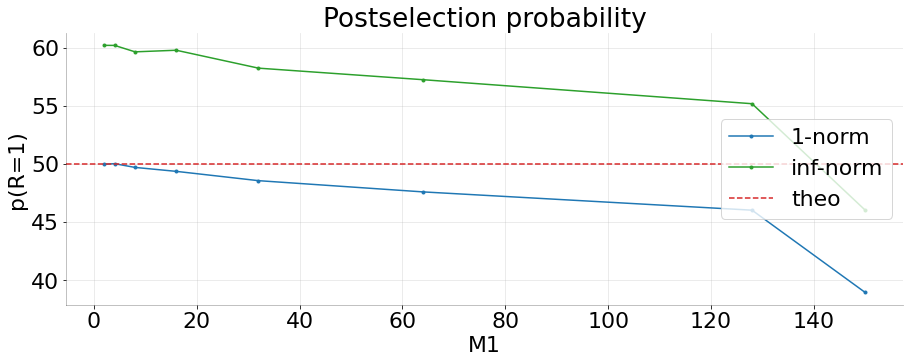

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df_prob['M1'],df_prob['p(R=1)_1-norm'], color='tab:blue', marker=".", label='1-norm')
plt.plot(df_prob['M1'],df_prob['p(R=1)_inf-norm'], color='tab:green', marker=".", label='inf-norm')
plt.axhline(y=df_prob['p(R=1)_theo'][0]*100, color='tab:red', linestyle='--', label='theo')
plt.title("Postselection probability")
plt.xlabel("M1")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [9]:
dataset = 'blobs'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_inf-norm
0,0,2.0,2.0,3.0,0.5,43.657,61.460
1,1,4.0,2.0,3.0,0.5,43.795,61.353
2,2,8.0,2.0,3.0,0.5,43.292,61.035
3,3,16.0,2.0,3.0,0.5,43.202,60.430
4,4,32.0,2.0,3.0,0.5,42.561,59.106
5,5,64.0,2.0,3.0,0.5,41.687,57.601
6,6,128.0,2.0,3.0,0.5,40.265,56.421
7,7,150.0,2.0,3.0,0.5,34.045,47.107


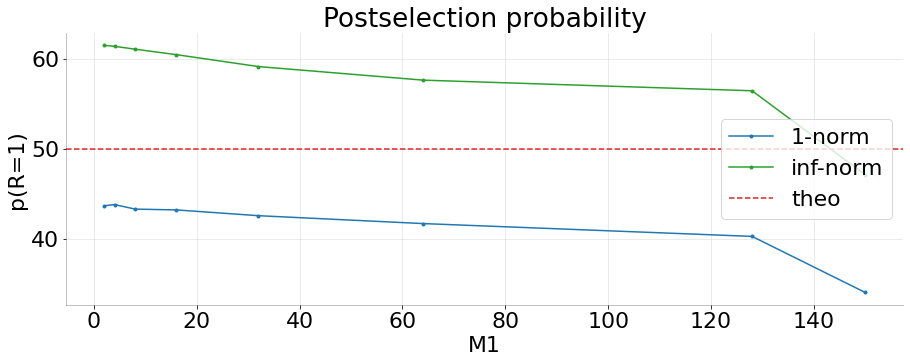

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df_prob['M1'],df_prob['p(R=1)_1-norm'], color='tab:blue', marker=".", label='1-norm')
plt.plot(df_prob['M1'],df_prob['p(R=1)_inf-norm'], color='tab:green', marker=".", label='inf-norm')
plt.axhline(y=df_prob['p(R=1)_theo'][0]*100, color='tab:red', linestyle='--', label='theo')
plt.title("Postselection probability")
plt.xlabel("M1")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [12]:
dataset = 'iris'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_inf-norm
0,0,2.0,4.0,3.0,0.25,21.905,51.079
1,1,4.0,4.0,3.0,0.25,21.768,51.183
2,2,8.0,4.0,3.0,0.25,21.558,50.869
3,3,16.0,4.0,3.0,0.25,21.827,50.497
4,4,32.0,4.0,3.0,0.25,20.967,49.211
5,5,64.0,4.0,3.0,0.25,20.496,48.665
6,6,128.0,4.0,3.0,0.25,19.904,47.437
7,7,150.0,4.0,3.0,0.25,16.724,40.198


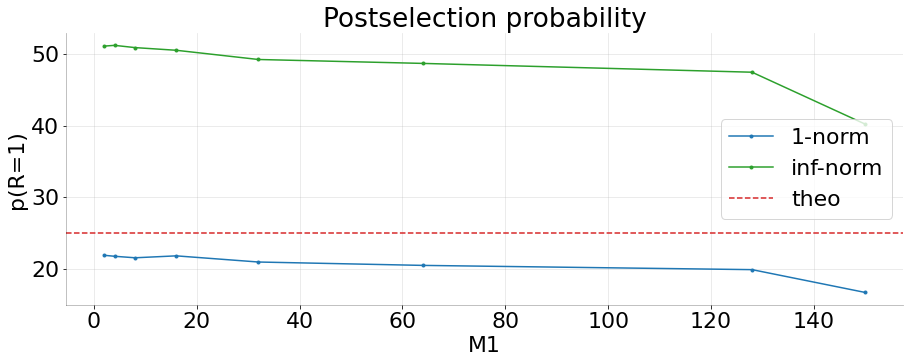

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df_prob['M1'],df_prob['p(R=1)_1-norm'], color='tab:blue', marker=".", label='1-norm')
plt.plot(df_prob['M1'],df_prob['p(R=1)_inf-norm'], color='tab:green', marker=".", label='inf-norm')
plt.axhline(y=df_prob['p(R=1)_theo'][0]*100, color='tab:red', linestyle='--', label='theo')
plt.title("Postselection probability")
plt.xlabel("M1")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [2]:
m = [x for x in range(2,65)]

In [3]:
prob = [50.008,43.846,50.077,40.693,44.071,47.056,49.958,39.902,41.574,42.608,44.492,45.138,46.875,48.705,50.296,38.507,40.12,40.766,42.065,42.505,41.628,43.744,45.081,44.545,44.858,44.741,47.83,46.826,48.833,49.263,50.064,40.231,40.909,40.085,39.252,39.255,41.626,40.799,42.563,40.9,43.509,42.143,41.691,41.85,41.488,41.333,45.911,45.573,45.931,44.926,44.214,44.189,44.763,44.303,48.027,46.932,46.159,45.772,48.808]

In [4]:
len(prob)

59

In [7]:
len(m)

59

In [6]:
m = [x for x in range(2,61)] 

In [11]:
prob = [x/100 for x in prob]

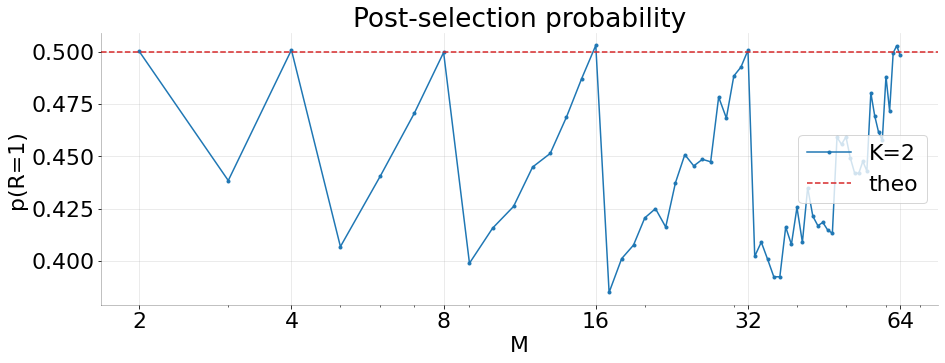

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 7)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(m,prob, color='tab:blue', marker=".", label='K=2')
#plt.plot(m,prob2, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [34]:
prob2 = [x-0.2 for x in prob]

In [21]:
prob

[0.5000800000000001,
 0.43845999999999996,
 0.5007699999999999,
 0.40692999999999996,
 0.44071,
 0.47056,
 0.49957999999999997,
 0.39902,
 0.41574,
 0.42607999999999996,
 0.44492,
 0.45138,
 0.46875,
 0.48705,
 0.50296,
 0.38506999999999997,
 0.4012,
 0.40765999999999997,
 0.42064999999999997,
 0.42505000000000004,
 0.41628,
 0.43744,
 0.45081000000000004,
 0.44545,
 0.44858,
 0.44741,
 0.4783,
 0.46826,
 0.48833,
 0.49262999999999996,
 0.50064,
 0.40231,
 0.40909,
 0.40085,
 0.39252000000000004,
 0.39255,
 0.41625999999999996,
 0.40799,
 0.42563,
 0.409,
 0.43509,
 0.42143,
 0.41691,
 0.41850000000000004,
 0.41487999999999997,
 0.41333,
 0.45911,
 0.45573,
 0.45931,
 0.44926,
 0.44214,
 0.44189,
 0.44763,
 0.44303,
 0.48027000000000003,
 0.46932,
 0.46159,
 0.45771999999999996,
 0.48808]

In [22]:
p1 = [47.164,49.935,50.277,49.823]

In [24]:
p1 = [x/100 for x in p1]

In [25]:
len(prob) + len(p1)

63

In [30]:
prob = prob + p1

In [32]:
prob

[0.5000800000000001,
 0.43845999999999996,
 0.5007699999999999,
 0.40692999999999996,
 0.44071,
 0.47056,
 0.49957999999999997,
 0.39902,
 0.41574,
 0.42607999999999996,
 0.44492,
 0.45138,
 0.46875,
 0.48705,
 0.50296,
 0.38506999999999997,
 0.4012,
 0.40765999999999997,
 0.42064999999999997,
 0.42505000000000004,
 0.41628,
 0.43744,
 0.45081000000000004,
 0.44545,
 0.44858,
 0.44741,
 0.4783,
 0.46826,
 0.48833,
 0.49262999999999996,
 0.50064,
 0.40231,
 0.40909,
 0.40085,
 0.39252000000000004,
 0.39255,
 0.41625999999999996,
 0.40799,
 0.42563,
 0.409,
 0.43509,
 0.42143,
 0.41691,
 0.41850000000000004,
 0.41487999999999997,
 0.41333,
 0.45911,
 0.45573,
 0.45931,
 0.44926,
 0.44214,
 0.44189,
 0.44763,
 0.44303,
 0.48027000000000003,
 0.46932,
 0.46159,
 0.45771999999999996,
 0.48808,
 0.47164,
 0.49935,
 0.50277,
 0.49823]

In [28]:
m.append(61)
m.append(62)
m.append(63)
m.append(64)

In [2]:
prob = [50.008,43.846,50.077,40.693,44.071,47.056,49.958,39.902,41.574,42.608,44.492,45.138,46.875,48.705,50.296,38.507,40.12,40.766,42.065,42.505,41.628,43.744,45.081,44.545,44.858,44.741,47.83,46.826,48.833,49.263,50.064,40.231,40.909,40.085,39.252,39.255,41.626,40.799,42.563,40.9,43.509,42.143,41.691,41.85,41.488,41.333,45.911,45.573,45.931,44.926,44.214,44.189,44.763,44.303,48.027,46.932,46.159,45.772,48.808,47.164,49.935,50.277,49.823,43.457,43.347,43.365,43.213,43.073,43.14,43.091,42.096,44.171,42.999,42.2,42.377,42.572,42.413,42.737,41.913,42.572,41.272,42.072,41.846,41.235,41.663,41.016,41.492,41.473,40.741,41.687,41.223,40.369,40.222,40.918,47.107,45.856,46.594,45.306,46.436,45.27,45.367,44.928,44.263,43.555,43.872,43.646,43.359,42.828,43.085,42.31,48.566,46.985,47.174,46.326,45.496,45.056,44.55,42.505,48.767,47.803,45.966,45.715,50.171,46.735,50.366,43.762,49.402]


In [3]:
m=[x for x in range(2,129)]

In [7]:
prob = [x/100 for x in prob]

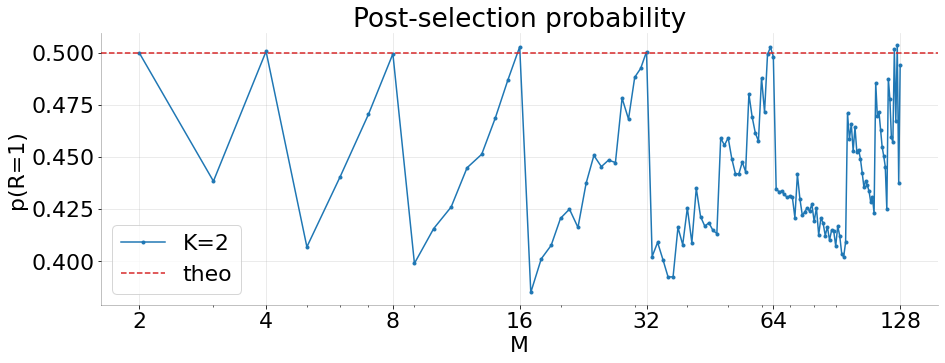

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(m,prob, color='tab:blue', marker=".", label='K=2')
#plt.plot(m,prob2, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [12]:
probk3 = [43.819,37.621,43.667,34.583,37.644,40.789,43.764,33.53,34.894,36.36,38.286,39.023,41.278,42.348,43.849,31.834,34.044,34.755,35.507,36.272,35.384,36.928,38.234,37.927,38.74,38.535,41.177,40.713,42.4,43.374,44.485,33.908,33.64,33.319,33.069,33.017,35.587,34.967,36.6,34.491,36.89,35.539,35.242,34.762,35.787,34.843,39.571,39.738,38.953,39.001,38.489,38.468,38.155,37.805,41.492,41.048,40.153,39.482,42.346,40.629,43.595,43.66,44.067,37.994,37.598,37.317,36.646,36.127,37.305,37.073,36.505,36.707,37.616,36.578,36.243,36.292,36.664,36.157,35.718,36.145,35.87,35.01,35.028,35.522,35.516,34.93,35.748,34.796,35.333,34.833,34.589,34.644,34.961,34.906,40.625,39.661,40.527,40.192,40.21,39.984,38.812,38.568,37.366,38.049,37.549,37.903,37.457,36.383,36.81,36.749,42.041,41.479,40.741,39.673,39.221,39.331,38.568,37.061,43.011,41.077,40.472,38.507,42.822,40.24,44.043,37.903,43.982]

In [16]:
probk3 = [c/100 for c in probk3]

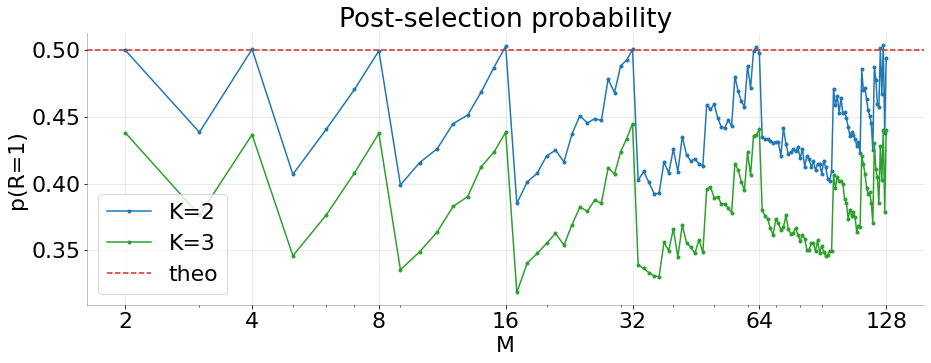

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(m,prob, color='tab:blue', marker=".", label='K=2')
plt.plot(m,probk3, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [8]:
len(probinf)

127

In [11]:
probinf = [61.386,
54.014,
61.416,
49.897,
54.058,
57.756,
61.406,
48.692,
50.853,
52.284,
54.696,
55.175,
57.821,
59.907,
60.942,
46.988,
49.654,
50.146,
51.976,
51.756,
50.869,
53.359,
55.658,
54.474,
55.732,
55.063,
58.45,
57.275,
60.168,
60.94,
61.832,
49.094,
49.106,
49.487,
48.413,
47.87,
51.749,
50.47,
53.952,
51.218,
52.426,
50.879,
51.046,
51.127,
51.619,
50.916,
56.938,
56.47,
55.343,
55.147,
55.509,
54.7,
54.199,
54.195,
59.79,
58.826,
57.812,
55.912,
60.6,
58.716,
61.275,
60.514,
61.115,
52.618,
53.65,
52.875,
53.156,
52.667,
53.143,
52.448,
53.149,
52.039,
52.02,
52.643,
51.263,
52.161,
51.691,
51.471,
51.471,
51.117,
51.373,
51.434,
51.593,
50.94,
51.105,
50.684,
50.513,
50.836,
50.409,
50.867,
50.342,
50.47,
49.438,
49.811,
57.251,
57.495,
57.697,
56.122,
56.689,
55.731,
55.933,
55.621,
54.694,
54.724,
54.205,
53.833,
53.796,
52.203,
53.052,
52.533,
59.686,
59.351,
57.983,
57.275,
56.732,
55.835,
54.681,
53.925,
62.158,
60.022,
58.777,
57.422,
62.17,
56.58,
60.846,
51.923,
61.548]


In [12]:
len(m)

127

In [13]:
m = [x for x in range(2,129)]
probinf = [x/100 for x in probinf]

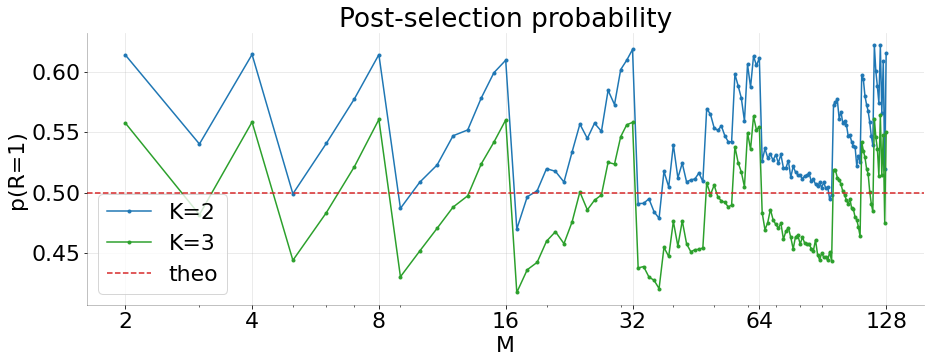

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(m,probinf, color='tab:blue', marker=".", label='K=2')
plt.plot(m,probinf2, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [42]:
dataset = 'noisymoon'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,Unnamed: 0.1,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_inf-norm,p(A=0)_1-norm,p(A=0)_inf-norm
0,0,0,2.0,2.0,2.0,0.5,50.020,61.416,50.038,49.873
1,1,1,3.0,2.0,2.0,0.5,43.783,53.794,49.995,50.098
2,2,2,4.0,2.0,2.0,0.5,50.050,61.320,50.115,50.013
3,3,3,5.0,2.0,2.0,0.5,40.734,50.095,49.912,50.078
4,4,4,6.0,2.0,2.0,0.5,43.901,54.209,49.988,50.111
...,...,...,...,...,...,...,...,...,...,...
249,249,249,124.0,2.0,3.0,0.5,42.871,57.068,46.543,50.395
250,250,250,125.0,2.0,3.0,0.5,40.002,51.373,46.122,50.910
251,251,251,126.0,2.0,3.0,0.5,43.591,55.463,46.261,50.906
252,252,252,127.0,2.0,3.0,0.5,37.280,46.356,47.371,49.158


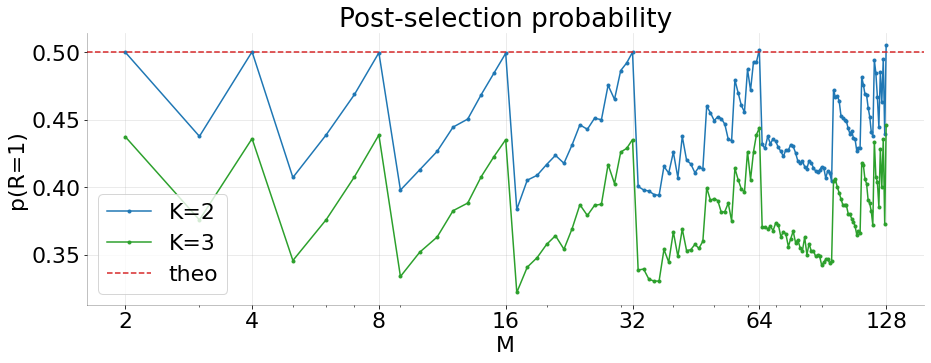

In [39]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(df_prob[df_prob['K']==2]['M1'],df_prob[df_prob['K']==2]['p(R=1)_1-norm']/100, color='tab:blue', marker=".", label='K=2')
plt.plot(df_prob[df_prob['K']==3]['M1'],df_prob[df_prob['K']==3]['p(R=1)_1-norm']/100, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

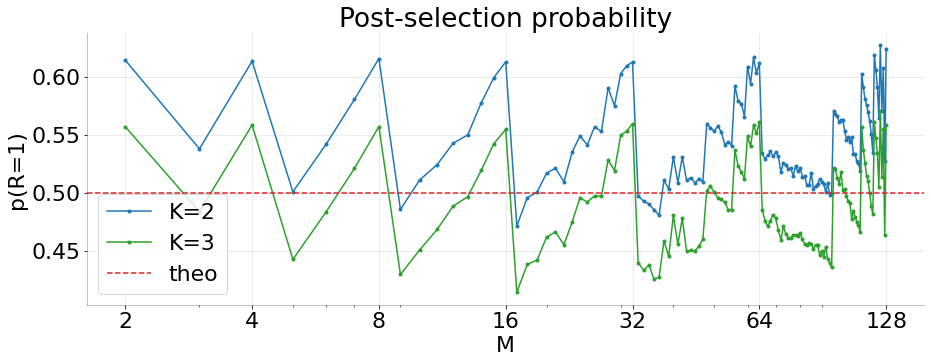

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(df_prob[df_prob['K']==2]['M1'],df_prob[df_prob['K']==2]['p(R=1)_inf-norm']/100, color='tab:blue', marker=".", label='K=2')
plt.plot(df_prob[df_prob['K']==3]['M1'],df_prob[df_prob['K']==3]['p(R=1)_inf-norm']/100, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

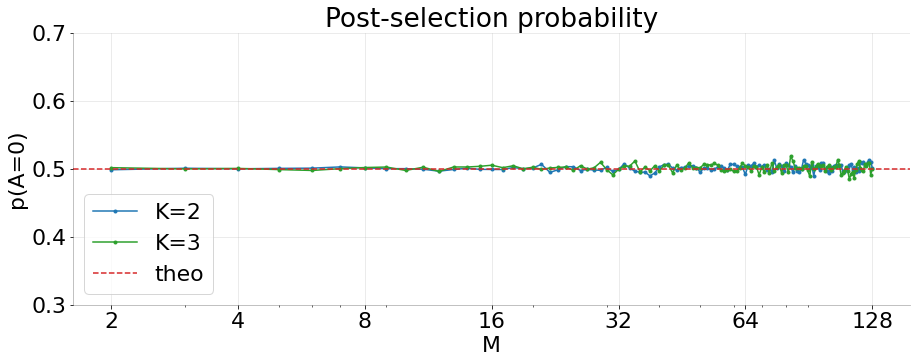

In [43]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(df_prob[df_prob['K']==2]['M1'],df_prob[df_prob['K']==2]['p(A=0)_inf-norm']/100, color='tab:blue', marker=".", label='K=2')
plt.plot(df_prob[df_prob['K']==3]['M1'],df_prob[df_prob['K']==3]['p(A=0)_inf-norm']/100, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(A=0)")
plt.ylim(0.3,0.7)
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

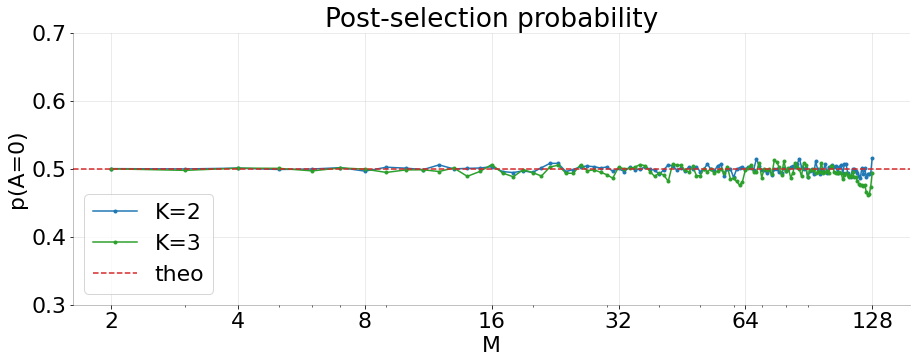

In [51]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(df_prob[df_prob['K']==2]['M1'],df_prob[df_prob['K']==2]['p(A=0)_1-norm']/100, color='tab:blue', marker=".", label='K=2')
plt.plot(df_prob[df_prob['K']==3]['M1'],df_prob[df_prob['K']==3]['p(A=0)_1-norm']/100, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(A=0)")
plt.ylim(0.3,0.7)
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [48]:
sum((df_prob[df_prob['K']==2]['p(R=1)_inf-norm']-df_prob[df_prob['K']==2]['p(R=1)_1-norm'])/100)/127

0.10236999999999997

In [49]:
sum((df_prob[df_prob['K']==3]['p(R=1)_inf-norm']-df_prob[df_prob['K']==3]['p(R=1)_1-norm'])/100)/127

0.10901511811023616

<h2>Final test<h2>

In [1]:
d = 1e-4

In [2]:
d

0.0001

In [7]:
import numpy as np
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2,3],[4,5,6]])

In [8]:
np.linalg.norm(A-B, ord='fro')

0.0

In [9]:
dataset = 'noisymoon_qkmeans'
df = pd.read_csv("result/" + str(dataset) + ".csv", sep=',')
df[['n_ite','avg_similarity','SSE','silhouette','v_measure','avg_ite_time']].to_csv('prova.csv')

In [8]:
df[['n_ite','avg_similarity','SSE','silhouette','v_measure','avg_ite_time']]

,n_ite,avg_similarity,SSE,silhouette,v_measure,avg_ite_time
0,6,96.56,847.569,0.703,0.661,50.16
1,7,97.05,845.374,0.713,0.664,44.66
2,10,97.53,845.374,0.713,0.664,48.13
3,10,97.60,846.555,0.720,0.675,58.23
4,10,97.27,848.476,0.700,0.661,73.57
5,10,97.73,844.891,0.693,0.644,84.10
6,10,97.33,845.855,0.711,0.664,121.75
7,10,97.20,844.532,0.705,0.653,114.35


<h2>Delta analysis<h2>

In [20]:
dataset = 'aniso'
df_deltakmeans = pd.read_csv("result/" + str(dataset) + "_deltakmeans.csv", sep=',')
df_deltakmeans

,index,date,K,M,N,delta,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-03-11 09:27:01,3,150,2,0.0,4,0.01,0.0001,98.67,861.388,0.676,0.688,0.688
1,1,2022-03-11 09:27:02,3,150,2,0.1,4,0.01,0.0001,98.67,861.388,0.676,0.688,0.688
2,2,2022-03-11 09:27:02,3,150,2,0.2,4,0.01,0.0001,98.67,861.388,0.676,0.688,0.688
3,3,2022-03-11 09:27:02,3,150,2,0.3,8,0.01,0.0001,98.83,871.370,0.673,0.700,0.700
4,4,2022-03-11 09:27:03,3,150,2,0.4,7,0.02,0.0001,98.76,871.370,0.673,0.700,0.700
5,5,2022-03-11 09:27:04,3,150,2,0.5,5,0.02,0.0001,98.40,866.599,0.674,0.694,0.694
6,6,2022-03-11 09:27:02,3,150,2,0.6,5,0.01,0.0001,98.67,866.599,0.674,0.694,0.694
7,7,2022-03-11 09:27:03,3,150,2,0.7,10,0.01,0.0001,98.73,867.518,0.669,0.665,0.665
8,8,2022-03-11 09:27:04,3,150,2,0.8,5,0.02,0.0001,98.27,866.580,0.674,0.694,0.694
9,9,2022-03-11 09:27:04,3,150,2,0.9,10,0.01,0.0001,97.67,882.645,0.659,0.684,0.684


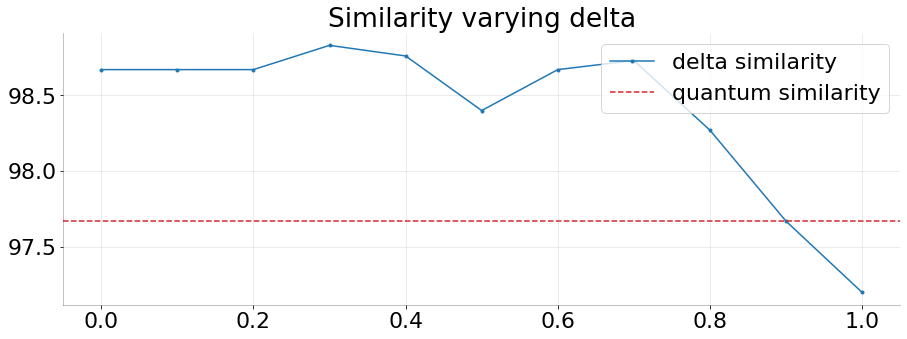

In [21]:
plt.figure(figsize=(15,5))
plt.plot(df_deltakmeans['delta'],df_deltakmeans['avg_similarity'], color='tab:blue', marker=".", label='delta similarity')
plt.axhline(y=97.67, color='tab:red', linestyle='--', label='quantum similarity')
plt.title("Similarity varying delta")
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [26]:
dataset = 'blobs'
df_deltakmeans = pd.read_csv("result/" + str(dataset) + "_deltakmeans.csv", sep=',')
df_deltakmeans

,index,date,K,M,N,delta,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-03-11 09:33:26,3,150,2,0.0,2,0.01,0.0001,100.00,857.021,0.858,1.000,1.000
1,1,2022-03-11 09:33:26,3,150,2,0.5,2,0.01,0.0001,100.00,857.021,0.858,1.000,1.000
2,2,2022-03-11 09:33:26,3,150,2,1.0,2,0.00,0.0001,100.00,857.021,0.858,1.000,1.000
3,3,2022-03-11 09:33:26,3,150,2,1.5,3,0.01,0.0001,99.56,856.569,0.849,0.970,0.970
4,4,2022-03-11 09:33:27,3,150,2,2.0,10,0.01,0.0001,96.67,856.875,0.749,0.862,0.862
5,5,2022-03-11 09:33:27,3,150,2,2.5,10,0.01,0.0001,90.87,849.851,0.495,0.744,0.744
6,6,2022-03-11 09:33:27,3,150,2,3.0,10,0.01,0.0001,86.73,849.975,0.472,0.740,0.740
7,7,2022-03-11 09:33:28,3,150,2,3.5,10,0.01,0.0001,85.40,839.293,0.396,0.715,0.715
8,8,2022-03-11 09:33:29,3,150,2,4.0,10,0.01,0.0001,74.73,886.706,0.289,0.580,0.580
9,9,2022-03-11 09:33:29,3,150,2,4.5,10,0.01,0.0001,73.13,879.777,0.311,0.587,0.587


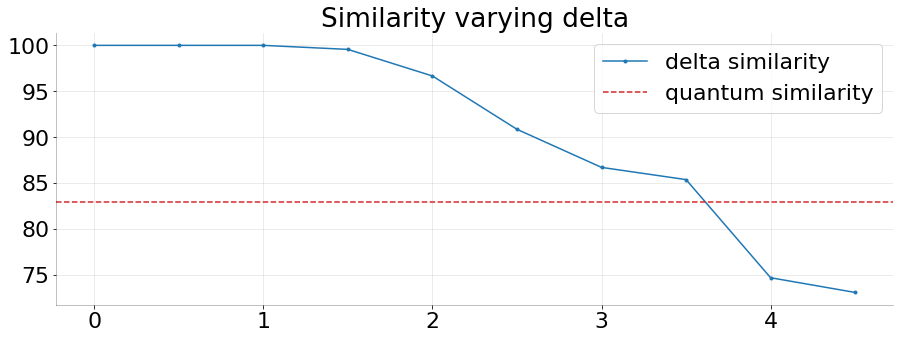

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df_deltakmeans['delta'],df_deltakmeans['avg_similarity'], color='tab:blue', marker=".", label='delta similarity')
plt.axhline(y=82.93, color='tab:red', linestyle='--', label='quantum similarity')
plt.title("Similarity varying delta")
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [37]:
dataset = 'blobs2'
df_deltakmeans = pd.read_csv("result/" + str(dataset) + "_deltakmeans.csv", sep=',')
df_deltakmeans

,index,date,K,M,N,delta,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-03-11 09:45:11,3,150,2,0.0,7,0.02,0.0001,97.24,847.332,0.729,0.687,0.687
1,1,2022-03-11 09:45:11,3,150,2,0.1,7,0.02,0.0001,97.24,847.332,0.729,0.687,0.687
2,2,2022-03-11 09:45:12,3,150,2,0.2,6,0.02,0.0001,97.00,847.332,0.729,0.687,0.687
3,3,2022-03-11 09:45:12,3,150,2,0.3,7,0.02,0.0001,97.24,847.332,0.729,0.687,0.687
4,4,2022-03-11 09:45:13,3,150,2,0.4,7,0.02,0.0001,97.43,847.332,0.729,0.687,0.687
5,5,2022-03-11 09:45:14,3,150,2,0.5,6,0.01,0.0001,97.00,847.332,0.729,0.687,0.687
6,6,2022-03-11 09:45:14,3,150,2,0.6,6,0.02,0.0001,97.00,847.332,0.729,0.687,0.687
7,7,2022-03-11 09:45:15,3,150,2,0.7,7,0.01,0.0001,97.24,847.332,0.729,0.687,0.687
8,8,2022-03-11 09:45:10,3,150,2,0.8,10,0.01,0.0001,97.73,849.961,0.729,0.700,0.700
9,9,2022-03-11 09:45:11,3,150,2,0.9,10,0.01,0.0001,97.67,844.672,0.729,0.680,0.680


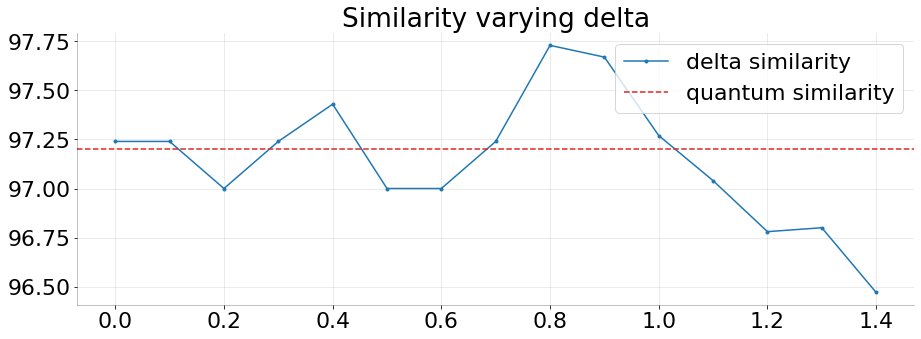

In [38]:
plt.figure(figsize=(15,5))
plt.plot(df_deltakmeans['delta'],df_deltakmeans['avg_similarity'], color='tab:blue', marker=".", label='delta similarity')
plt.axhline(y=97.2, color='tab:red', linestyle='--', label='quantum similarity')
plt.title("Similarity varying delta")
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [48]:
dataset = 'noisymoon'
df_deltakmeans = pd.read_csv("result/" + str(dataset) + "_deltakmeans.csv", sep=',')
df_deltakmeans

,index,date,K,M,N,delta,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-03-11 09:55:36,2,150,2,0.0,4,0.01,0.0001,98.67,948.115,0.542,0.382,0.382
1,1,2022-03-11 09:55:36,2,150,2,0.1,4,0.01,0.0001,98.50,948.115,0.542,0.382,0.382
2,2,2022-03-11 09:55:36,2,150,2,0.2,4,0.01,0.0001,98.50,948.115,0.542,0.382,0.382
3,3,2022-03-11 09:55:37,2,150,2,0.3,3,0.01,0.0001,98.44,948.115,0.542,0.382,0.382
4,4,2022-03-11 09:55:37,2,150,2,0.4,3,0.01,0.0001,98.44,948.115,0.542,0.382,0.382
5,5,2022-03-11 09:55:37,2,150,2,0.5,4,0.01,0.0001,98.50,948.115,0.542,0.382,0.382
6,6,2022-03-11 09:55:38,2,150,2,0.6,4,0.02,0.0001,98.67,939.174,0.542,0.366,0.366
7,7,2022-03-11 09:55:38,2,150,2,0.7,4,0.01,0.0001,98.50,948.115,0.542,0.382,0.382
8,8,2022-03-11 09:55:38,2,150,2,0.8,6,0.02,0.0001,98.89,948.115,0.542,0.382,0.382
9,9,2022-03-11 09:55:39,2,150,2,0.9,8,0.01,0.0001,99.08,948.115,0.542,0.382,0.382


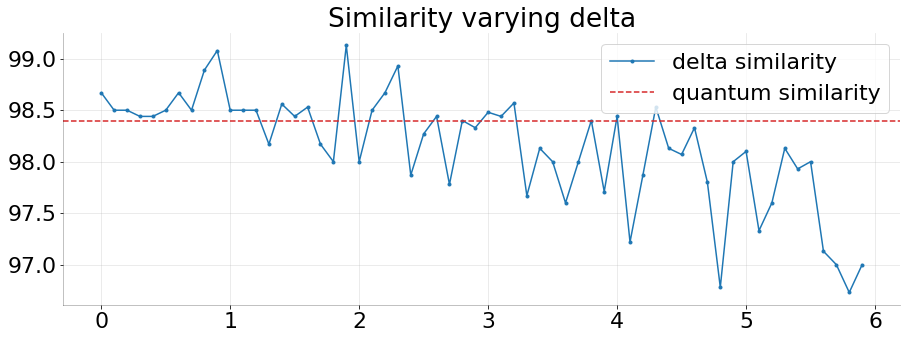

In [49]:
plt.figure(figsize=(15,5))
plt.plot(df_deltakmeans['delta'],df_deltakmeans['avg_similarity'], color='tab:blue', marker=".", label='delta similarity')
plt.axhline(y=98.4, color='tab:red', linestyle='--', label='quantum similarity')
plt.title("Similarity varying delta")
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

<h2>Elbow method<h2>

In [2]:
dataset = 'iris'
df_kmeans = pd.read_csv("result/" + str(dataset) + "_kmeans.csv", sep=',')
df_kmeans

,index,date,K,M,N,n_ite,avg_ite_time,treshold,SSE,silhouette,v_measure,nm_info
0,0,2022-03-13 09:37:00,2,150,4,5,0.02,0.0001,970.511,0.540,None,None
1,1,2022-03-13 09:37:01,3,150,4,4,0.00,0.0001,565.500,0.510,None,None
2,2,2022-03-13 09:37:01,4,150,4,8,0.00,0.0001,445.732,0.495,None,None
3,3,2022-03-13 09:37:01,5,150,4,6,0.00,0.0001,385.015,0.478,None,None
4,4,2022-03-13 09:37:01,6,150,4,6,0.00,0.0001,293.865,0.448,None,None
5,5,2022-03-13 09:37:01,7,150,4,5,0.00,0.0001,254.076,0.464,None,None
6,6,2022-03-13 09:37:01,8,150,4,6,0.00,0.0001,234.106,0.416,None,None


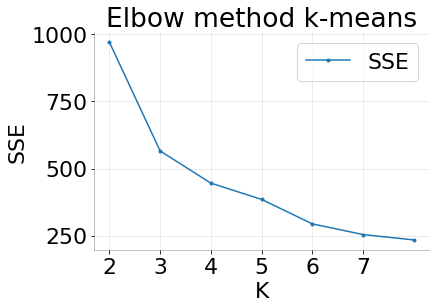

In [17]:
plt.plot(df_kmeans['K'], df_kmeans['SSE'],color='tab:blue', marker=".", label='SSE')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(2, 8, 1))
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.title("Elbow method k-means")
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [5]:
dataset = 'iris'
df_qkmeans = pd.read_csv("result/" + str(dataset) + "_qkmeans.csv", sep=',')
df_qkmeans

,index,date,q_v,K,M,N,M1,shots,n_circuits,max_qbits,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-03-12 15:57:04,3,2,150,4,150,307200,1,22,6,1370.44,0.0001,97.89,1297.958,0.522,None,None
1,1,2022-03-12 18:14:08,3,3,150,4,150,460800,1,23,10,1819.53,0.0001,92.13,1204.860,0.387,None,None
2,2,2022-03-12 15:57:04,3,4,150,4,150,500000,1,23,10,1684.03,0.0001,88.07,1175.987,0.337,None,None
3,3,2022-03-12 20:37:46,3,5,150,4,150,500000,1,24,10,2074.98,0.0001,74.73,1191.886,0.130,None,None
4,4,2022-03-12 15:57:04,3,6,150,4,150,500000,1,24,10,2760.55,0.0001,72.20,1174.370,0.092,None,None
5,5,2022-03-12 23:37:12,3,7,150,4,150,500000,1,24,10,1369.39,0.0001,56.87,1154.670,-0.072,None,None
6,6,2022-03-12 15:57:04,3,8,150,4,150,500000,1,24,10,2770.43,0.0001,48.87,1151.256,-0.120,None,None


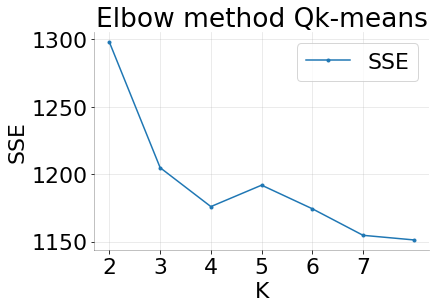

In [16]:
plt.plot(df_qkmeans['K'], df_qkmeans['SSE'],color='tab:blue', marker=".", label='SSE')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(2, 8, 1))
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.title("Elbow method Qk-means")
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [18]:
df_kmeans[df_kmeans['K']==3]

,index,date,K,M,N,n_ite,avg_ite_time,treshold,SSE,silhouette,v_measure,nm_info
1,1,2022-03-13 09:37:01,3,150,4,4,0.0,0.0001,565.5,0.51,None,None


In [19]:
df_qkmeans[df_qkmeans['K']==3]

,index,date,q_v,K,M,N,M1,shots,n_circuits,max_qbits,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
1,1,2022-03-12 18:14:08,3,3,150,4,150,460800,1,23,10,1819.53,0.0001,92.13,1204.86,0.387,None,None


In [2]:
dataset = 'diabetes'
df_kmeans = pd.read_csv("result/" + str(dataset) + "_kmeans.csv", sep=',')
df_kmeans

,index,date,K,M,N,n_ite,avg_ite_time,treshold,SSE,silhouette,v_measure,nm_info
0,0,2022-03-14 15:11:13,2,442,4,9,0.0,0.0001,4616.529,0.243,None,None
1,1,2022-03-14 15:11:14,3,442,4,10,0.0,0.0001,3848.577,0.232,None,None
2,2,2022-03-14 15:11:14,4,442,4,10,0.0,0.0001,3277.650,0.245,None,None
3,3,2022-03-14 15:11:14,5,442,4,9,0.0,0.0001,2876.451,0.256,None,None
4,4,2022-03-14 15:11:14,6,442,4,10,0.0,0.0001,2396.630,0.299,None,None
5,5,2022-03-14 15:11:14,7,442,4,10,0.0,0.0001,2032.898,0.332,None,None
6,6,2022-03-14 15:11:14,8,442,4,7,0.0,0.0001,1671.271,0.371,None,None
7,7,2022-03-14 15:11:14,9,442,4,6,0.0,0.0001,1575.208,0.349,None,None
8,8,2022-03-14 15:11:15,10,442,4,10,0.0,0.0001,1497.228,0.342,None,None
9,9,2022-03-14 15:11:15,11,442,4,10,0.0,0.0001,1435.245,0.332,None,None


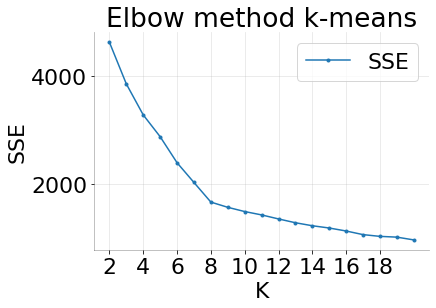

In [3]:
plt.plot(df_kmeans['K'], df_kmeans['SSE'],color='tab:blue', marker=".", label='SSE')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(2, 20, 2))
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.title("Elbow method k-means")
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()